In [12]:
import numpy as np
import networkx as nx
import torch_geometric
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()
from torch_geometric.utils import to_networkx
from IPython.display import clear_output

In [3]:
dataset = torch_geometric.datasets.TUDataset(root = "/Users/porlu/Documents/University_courses/knowl_repr", name = "PROTEINS", cleaned = True, use_edge_attr = True, use_node_attr  = True)
clear_output()

In [5]:

for i in range(len(dataset)):
    if dataset[i].y == 1:
        print("There are {}% of negatively classified entries in dataset".format(i / len(dataset)))
        break

There are 0.6482051282051282% of negatively classified entries in dataset


Classes are little bit imbalanced, as we can see

In [6]:
data_0 = dataset[22]
data_0_nx = to_networkx(data_0,to_undirected=True )
data_1 = dataset[914]
data_1_nx = to_networkx(data_1,to_undirected=True)

Short description of graphs:\
No features of edges\
4 features per node\
2 classes for graph itself that we need to predict


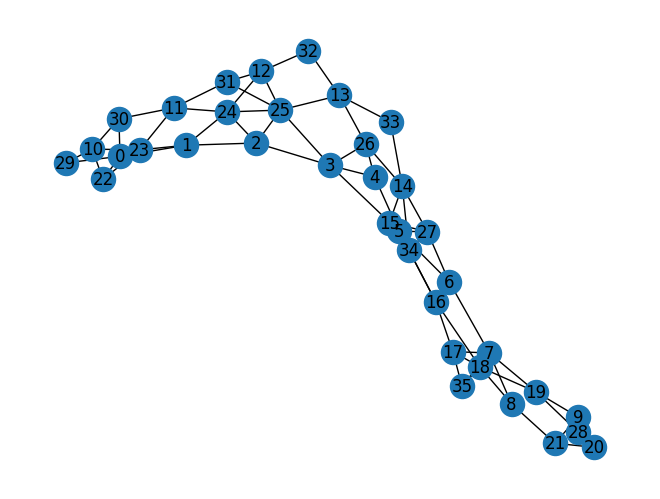

In [8]:
nx.draw(data_0_nx, with_labels = True)

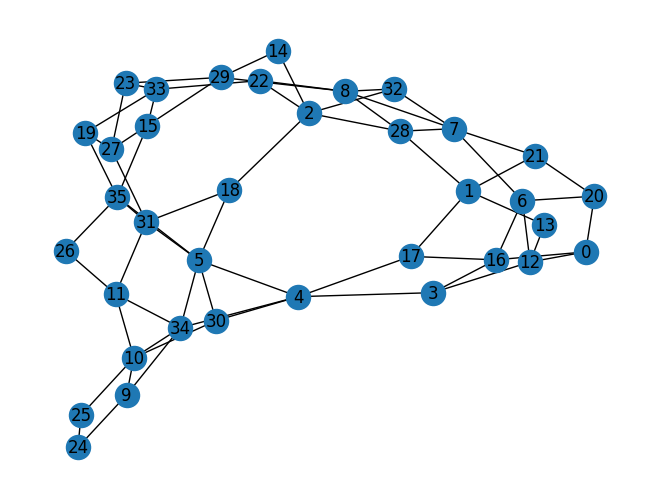

In [9]:
nx.draw(data_1_nx, with_labels = True, )

### Collecting the statistics about graphs in two groups.
Here I will calculate different metrics for graphs in both groups and print them \
Equal metrics wasn't left here

In [16]:
start_for_0 = 20 # the index from which we will iterate. 
start_for_1 = 800 # the index from which we will iterate. 
number_of_graphs = 150

In [17]:
nx_graphs_0 = []
nx_graphs_1 = []
for i in range (number_of_graphs):
    nx_graphs_0.append(to_networkx(dataset[start_for_0 + i],to_undirected=True))
    nx_graphs_1.append(to_networkx(dataset[start_for_1 + i],to_undirected=True))

#### Closeness centrality

For 0 class closeness centrality is in average 0.22071152322363674 +- 0.09551426781335981
For 1 class closeness centrality is in average 0.3129553551171996 +- 0.13673232699811913


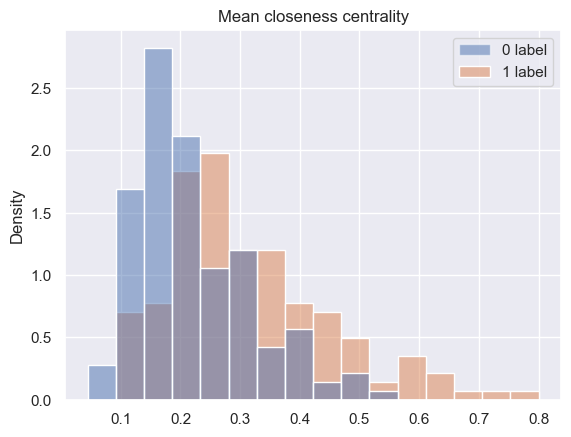

In [48]:
metrics_for_0 = []
metrics_for_1 = []
for G in nx_graphs_0:
    metrics_for_0.append(np.mean(list(nx.closeness_centrality(G).values())))

for G in nx_graphs_1:
    metrics_for_1.append(np.mean(list(nx.closeness_centrality(G).values())))

print("For 0 class closeness centrality is in average {} +- {}".format(np.mean(metrics_for_0), np.std(metrics_for_0)))
print("For 1 class closeness centrality is in average {} +- {}".format(np.mean(metrics_for_1), np.std(metrics_for_1)))

ax = plt.subplot()
sns.histplot([metrics_for_0, metrics_for_1], stat="density", ax=ax, alpha = 0.5)
#sns.histplot(metrics_for_1, stat="density", alpha = 0.5, ax=ax)
ax.set_title("Mean closeness centrality")
ax.legend(["0 label", "1 label"])

Betweeness centrality

For 0 class edge betweenness centrality is in average 0.07418968314765237 +- 0.030702268466598185
For 1 class edge betweenness centrality is in average 0.09196030461339935 +- 0.03882859972508584


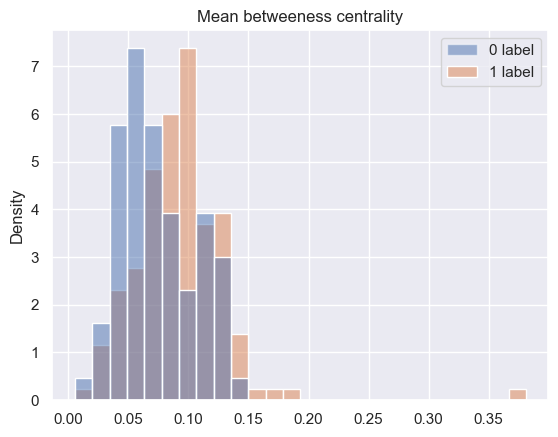

In [49]:
metrics_for_0 = []
metrics_for_1 = []
for G in nx_graphs_0:
    metrics_for_0.append(np.mean(list(nx.edge_betweenness_centrality(G).values())))

for G in nx_graphs_1:
    metrics_for_1.append(np.mean(list(nx.edge_betweenness_centrality(G).values())))

print("For 0 class edge betweenness centrality is in average {} +- {}".format(np.mean(metrics_for_0), np.std(metrics_for_0)))
print("For 1 class edge betweenness centrality is in average {} +- {}".format(np.mean(metrics_for_1), np.std(metrics_for_1)))

ax = plt.subplot()
sns.histplot([metrics_for_0, metrics_for_1], stat="density", ax=ax, alpha = 0.5)
#sns.histplot(metrics_for_1, stat="density", alpha = 0.5, ax=ax)
ax.set_title("Mean betweeness centrality")
ax.legend(["0 label", "1 label"])

For 0 class edge betweenness centrality is in average 52.526666666666664 +- 61.184714503615105
For 1 class edge betweenness centrality is in average 26.926666666666666 +- 17.502798506397642


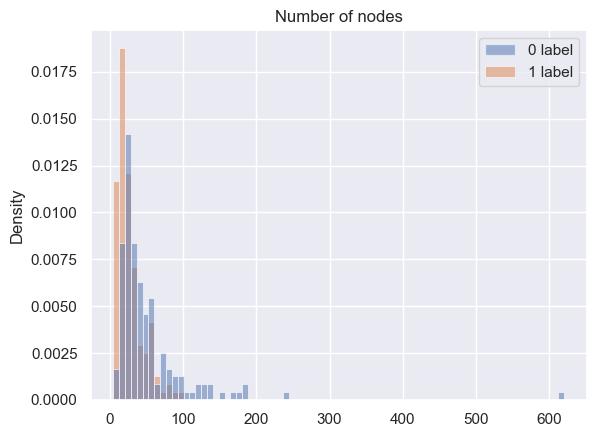

In [47]:
metrics_for_0 = []
metrics_for_1 = []
for G in nx_graphs_0:
    metrics_for_0.append(len(G.nodes))

for G in nx_graphs_1:
    metrics_for_1.append(len(G.nodes))

print("For 0 class edge betweenness centrality is in average {} +- {}".format(np.mean(metrics_for_0), np.std(metrics_for_0)))
print("For 1 class edge betweenness centrality is in average {} +- {}".format(np.mean(metrics_for_1), np.std(metrics_for_1)))

ax = plt.subplot()
sns.histplot([metrics_for_0, metrics_for_1], stat="density", ax=ax, alpha = 0.5)
ax.set_title("Number of nodes")
ax.legend(["0 label", "1 label"])

For 0 class edge betweenness centrality is in average 0.03161613625971731 +- 0.018881867633068785
For 1 class edge betweenness centrality is in average 0.05241242447506697 +- 0.030179870387977977


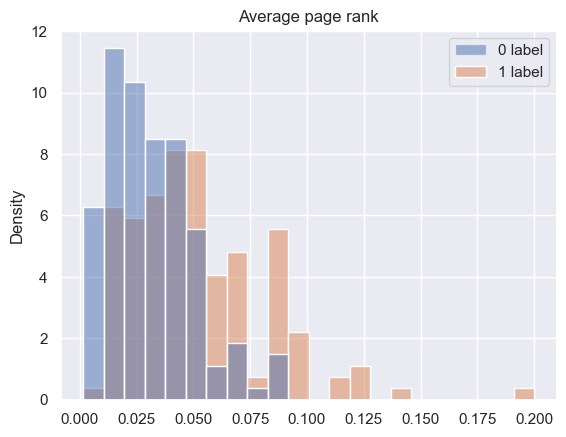

In [53]:
metrics_for_0 = []
metrics_for_1 = []
for G in nx_graphs_0:
    metrics_for_0.append(np.mean(list(nx.pagerank(G).values())))

for G in nx_graphs_1:
    metrics_for_1.append(np.mean(list(nx.pagerank(G).values())))

print("For 0 class edge betweenness centrality is in average {} +- {}".format(np.mean(metrics_for_0), np.std(metrics_for_0)))
print("For 1 class edge betweenness centrality is in average {} +- {}".format(np.mean(metrics_for_1), np.std(metrics_for_1)))

ax = plt.subplot()
sns.histplot([metrics_for_0, metrics_for_1], stat="density", ax=ax, alpha = 0.5)
ax.set_title("Average page rank")
ax.legend(["0 label", "1 label"])